In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_content = pd.read_csv("Uncleaned_data/Content.csv")

In [5]:
df_reactions = pd.read_csv("Uncleaned_data/Reactions.csv")

In [6]:
df_reaction_type = pd.read_csv("Uncleaned_data/ReactionTypes.csv")

In [7]:
df_content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [8]:
df_reactions.head(5)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [9]:
df_reaction_type

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [10]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [11]:
df_content.drop(columns=['URL','User ID'],axis =1,inplace = True)

In [12]:
df_content.isnull().sum()

Unnamed: 0    0
Content ID    0
Type          0
Category      0
dtype: int64

In [13]:
df_content["Category"].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [14]:
df_content["Category"] = df_content["Category"].apply(lambda x: x.replace('"',''))

In [15]:
df_content["Category"].value_counts()

Category
technology         72
animals            68
travel             67
culture            66
science            64
food               62
healthy eating     61
cooking            61
soccer             61
fitness            61
tennis             59
dogs               58
education          57
studying           56
veganism           49
public speaking    49
Fitness             5
Animals             4
Science             4
Soccer              3
Food                2
Studying            2
Education           2
Travel              2
Technology          1
Culture             1
Healthy Eating      1
Veganism            1
Public Speaking     1
Name: count, dtype: int64

In [16]:
df_content["Category"].duplicated().sum()

971

In [17]:
df_content["Category"].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

In [18]:
df_content["Category"].isna().sum()

0

In [19]:
df_content["Category"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Category, Length: 1000, dtype: bool

In [20]:
correct_values = {'studying':'Studying','healthy eating':'Healthy Eating',
                  'technology':'Technology','food':'Food','cooking':'Cooking',
                  'fitness':'Fitness','soccer':'Soccer','education':'Education',
                  'science':'Science','travel':'Travel','culture':'Culture',
                  'public speaking':'Public Speaking','tennis':'Tennis',
                  'dogs':'Dogs','veganism':'Veganism','animals':'Animals'}

In [21]:
df_content["Category"].duplicated().sum()

971

In [22]:
df_content["Category"] = df_content["Category"].replace(correct_values)


In [23]:
df_content["Category"].value_counts()

Category
Technology         73
Animals            72
Travel             69
Science            68
Culture            67
Fitness            66
Food               64
Soccer             64
Healthy Eating     62
Cooking            61
Tennis             59
Education          59
Studying           58
Dogs               58
Public Speaking    50
Veganism           50
Name: count, dtype: int64

In [24]:
df_content["Category"].duplicated().sum()

984

In [25]:
df_content["Type"].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [26]:
df_content.rename(columns = {'Type': "Content Type"},inplace = True)

In [27]:
df_content.duplicated().sum()

0

In [28]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   Content ID    1000 non-null   object
 2   Content Type  1000 non-null   object
 3   Category      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [29]:
df_content.to_csv("Content.csv")

In [30]:
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [31]:
df_reactions.drop(columns=['User ID'],axis =1,inplace = True)

In [32]:
df_reactions.isnull().sum()

Unnamed: 0      0
Content ID      0
Type          980
Datetime        0
dtype: int64

In [33]:
df_reactions["Type"].unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [34]:
df_reactions.dropna(subset=['Type'], how='any', inplace=True)

In [35]:
df_reactions.rename(columns = {'Type': "Reaction Type"},inplace = True)

In [36]:
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.9+ KB


In [37]:
df_reactions.to_csv('Reactions.csv')

In [38]:
df_reaction_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [39]:
df_reaction_type.rename(columns = {'Type': "Reaction Type"},inplace = True)

In [40]:
df_reaction_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16 non-null     int64 
 1   Reaction Type  16 non-null     object
 2   Sentiment      16 non-null     object
 3   Score          16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [41]:
df_reaction_type.to_csv('ReactionTypes.csv')

In [42]:
df_reaction_type.head()

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [43]:
df_reaction_type["Reaction Type"].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [44]:
df_reactions.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [45]:
df_content.head()

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy Eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy Eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,Technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,Food


In [46]:
df_merged = pd.merge(df_reactions, df_content, on='Content ID')

In [47]:
df_merged

,Unnamed: 0_x,Content ID,Reaction Type,Datetime,Unnamed: 0_y,Content Type,Category
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,photo,Studying
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,photo,Studying
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,photo,Studying
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,photo,Studying
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0,photo,Studying
...,...,...,...,...,...,...,...
24568,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,999,audio,Technology
24569,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,999,audio,Technology
24570,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,999,audio,Technology
24571,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,999,audio,Technology


In [48]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0_x   24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Unnamed: 0_y   24573 non-null  int64 
 5   Content Type   24573 non-null  object
 6   Category       24573 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


In [49]:
df_merged.nunique()

Unnamed: 0_x     24573
Content ID         962
Reaction Type       16
Datetime         24562
Unnamed: 0_y       962
Content Type         4
Category            16
dtype: int64

In [50]:
df_reaction_type.head()

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [51]:
df_cleaned = pd.merge(df_merged, df_reaction_type, on='Reaction Type',how ='inner')

In [52]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0_x   24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Unnamed: 0_y   24573 non-null  int64 
 5   Content Type   24573 non-null  object
 6   Category       24573 non-null  object
 7   Unnamed: 0     24573 non-null  int64 
 8   Sentiment      24573 non-null  object
 9   Score          24573 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.9+ MB


In [53]:
df_cleaned.drop(columns = ["Unnamed: 0_x","Unnamed: 0_y","Unnamed: 0"],axis = 1,inplace =True)

In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [55]:
from datetime import date

In [58]:
df_cleaned.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [59]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [60]:
df_cleaned["Category"].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [66]:
#df_cleaned.Datetime.dt.month
df_cleaned['Month']= pd.DatetimeIndex(df_cleaned['Datetime']).month_name()

In [123]:
df_cleaned.rename(columns = {'Content ID': 'Content_ID',
                          'Reaction Type': 'Reaction_type',
                          'Content Type': 'Content_type'},inplace = True)

In [125]:
df_cleaned

,Content_ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10,June
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15,April
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0,January
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30,August
...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,Technology,negative,10,June
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,Technology,positive,45,February
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,Technology,positive,30,September
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,Technology,negative,12,November


In [126]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content_ID     24573 non-null  object
 1   Reaction_type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content_type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
 7   Month          24573 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.5+ MB


In [127]:
df_cleaned["Score"].unique()

array([ 0, 10, 15, 30, 35, 70,  5, 65, 20, 75, 45, 12, 50, 60, 72])

In [128]:
Top_Categories = df_cleaned.groupby('Category').Score.agg(["sum"])
#Top_Categories = df_cleaned.groupby('Category').Reaction Type'].agg(["count"])
Top_Categories['Reaction_Count'] = df_cleaned.groupby(['Category']).Sentiment.agg(["count"])


In [186]:
df_cleaned["Month"].value_counts()

Month
May          2138
January      2126
August       2114
December     2092
July         2070
October      2056
November     2034
September    2022
June         2021
March        2012
April        1974
February     1914
Name: count, dtype: int64

In [130]:
#Top_Categories['Monthly Count'] = df_cleaned['Month'].agg(["count"])

In [90]:
Top_Categories

,sum,Reaction Count
Category,,
Animals,74965,1897
Cooking,64756,1664
Culture,66579,1676
Dogs,52511,1338
Education,57436,1433
Fitness,55323,1395
Food,66676,1699
Healthy Eating,69339,1717
Public Speaking,49264,1217


In [188]:
top_five = Top_Categories.sort_values(by = 'sum',ascending = False).head()

In [189]:
top_five

,sum,Reaction_Count
Category,,
Animals,74965,1897
Science,71168,1796
Healthy Eating,69339,1717
Technology,68738,1698
Food,66676,1699


In [190]:
top_five.rename(columns = {'sum':'Aggregated Score'},inplace = True)

In [191]:
top_five

,Aggregated Score,Reaction_Count
Category,,
Animals,74965,1897
Science,71168,1796
Healthy Eating,69339,1717
Technology,68738,1698
Food,66676,1699


In [192]:
top_five.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Animals to Food
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Aggregated Score  5 non-null      int64
 1   Reaction_Count    5 non-null      int64
dtypes: int64(2)
memory usage: 120.0+ bytes


In [193]:
df_cleaned.to_csv("Final_data.csv")

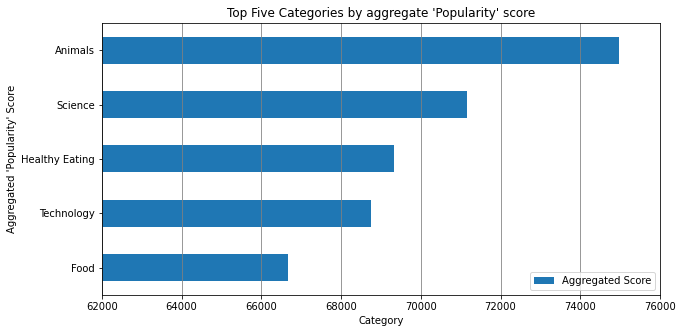

In [194]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
res = top_five['Aggregated Score'].sort_values(ascending = True).plot(kind="barh").get_figure()
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xlim(62000,76000)
plt.title("Top Five Categories by aggregate 'Popularity' score")
plt.xlabel("Category")
plt.ylabel("Aggregated 'Popularity' Score")
plt.legend()
plt.grid(which = 'major',axis = 'x',color = "grey")

# Save figure
res.savefig('Bar_Chart.pdf')

plt.show()

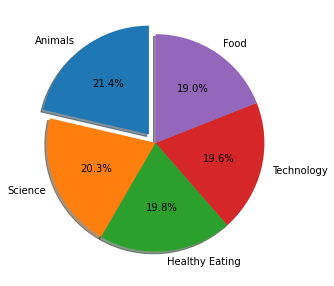

<Figure size 432x288 with 0 Axes>

In [218]:
#Pie Chart
fig = plt.figure(figsize = (10, 5))
explode = explode = [0.1, 0,0, 0, 0]
plt.pie(top_five['Aggregated Score'],labels = top_five.index,autopct='%1.1f%%',explode=explode,shadow=True,startangle=90)

plt.show()
# Save figure
plt.savefig('piechart.png',dpi=150)